We will use different algorithms to create models for predicting fraudulant transactions.
Data source: https://www.kaggle.com/mlg-ulb/creditcardfraud

1. Let's try XGBoost. Tutorial: https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

In [1]:
# Importing classes that will be used later.
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# load data
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('train/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Split training data.
from sklearn.model_selection import train_test_split
X = df.drop('Class',axis=1)
y = df['Class']
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [4]:
# Train the model.
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [5]:
# Make predictions for test data.
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [22]:
# Evaluate predictions.
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Here we show the logic of accuracy_score: it basically counts the percentage of non-diff.
diff = 0
for i in range(len(y_test)):
    if y_test[i] != predictions[i]: diff += 1
print("diff: {}, non-diff rate: {}%".format(diff,100-round(diff/len(y_test)*100,2)))

Accuracy: 99.96%
diff: 36, non-diff rate: 99.96%


In [8]:
# Check out confusion matrix and calculate recall and accuracy.
from sklearn.metrics import confusion_matrix
data = confusion_matrix(y_test,predictions)
recall,precision = data[1][1]/sum(data[1]),data[1][1]/(data[0][1]+data[1][1])
print('recall is {}%, precision is {}%'.format(round(recall*100,1),round(precision*100,1)))

recall is 83.1%, precision is 94.5%


In [9]:
# Let's try normalize training data with StandardScalar, which makes sure the standard deviation of the data is 1 and mean is 0. Then we run the training and testing again.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Convert to numpy arrays for tensorflow.
y_train = y_train.values
y_test = y_test.values

# Transform to scaled.
X_train_scaled = scaler.fit_transform(X_train,y_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Train again.
model_scaled = XGBClassifier()
model_scaled.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
# Predict again.
y_pred_scaled = model_scaled.predict(X_test_scaled)
predictions_scaled = [round(value) for value in y_pred_scaled]

In [13]:
# Let's see recall and accuracy. It is the same as non-scaled version.
# It seems normalization is not needed for XGBoost: https://github.com/dmlc/xgboost/issues/2621
# Both decision trees and random forest are not sensitive to monotonic transformation: https://stats.stackexchange.com/questions/353462/what-are-the-implications-of-scaling-the-features-to-xgboost
data = confusion_matrix(y_test,predictions_scaled)
recall,precision = data[1][1]/sum(data[1]),data[1][1]/(data[0][1]+data[1][1])
print('recall is {}%, precision is {}%'.format(round(recall*100,1),round(precision*100,1)))

recall is 83.1%, precision is 94.5%


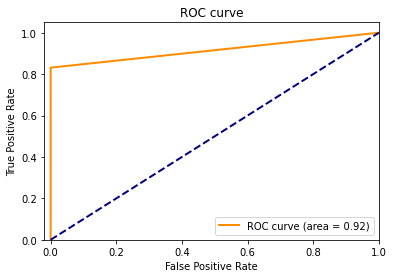

In [21]:
# Plot ROC curve.
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
#xgb.plot_importance(gbm)
#plt.show()
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()